## Задача 1

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

__а)__

In [2]:
# Создадим функцию для подсчета вероятности
def P(n, k):
    return (np.math.factorial(n - 1) / np.math.factorial(n - (k - 1))) * ((k - 1) / n**(k - 1))


# Создадим функцию для поиска оценки метода максимального правдоподобия как максимум функции правдоподобия
def ML_estimation(L_values):
    return n_values[np.argmax(L_values)]


n_values = range(9, 101)

In [3]:
# Найдем оценку максимального правдоподбия для нашего случая
L_values = np.vectorize(P)(n_values, 10)
n_hat_ML = ML_estimation(L_values)
n_hat_ML

42

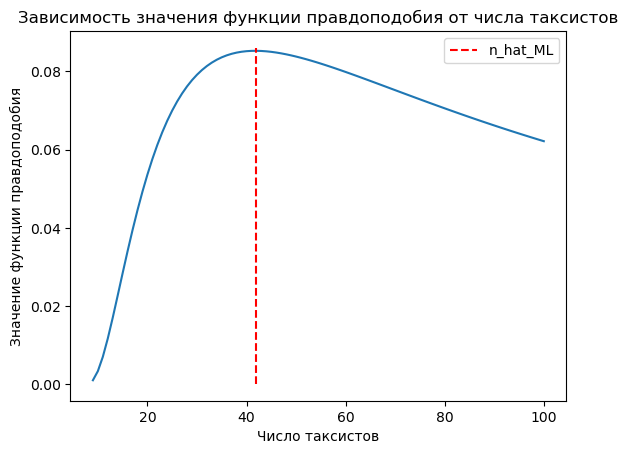

In [4]:
# Построим график функции правдоподобия в зависимости от числа таксистов
plt.plot(n_values, L_values)
plt.vlines(n_hat_ML, 0, 0.086, linestyles='dashed', color='red', label='n_hat_ML')

plt.title('Зависимость значения функции правдоподобия от числа таксистов')
plt.xlabel('Число таксистов')
plt.ylabel('Значение функции правдоподобия')
plt.legend();

__б)__

In [5]:
# Создадим функцию для подсчета вероятности
def P(n, k):
    return (np.math.factorial(n - 1) / np.math.factorial(n - (k - 1))) * ((k - 1) / n**(k - 1))


# Создадим функцию для подсчета математического ожидания
def E(n):
    return np.sum([k * P(n, k) for k in range(2, n + 2)])


# Создадим функцию для поиска оценки метода моментов
def MM_estimation(n_values, k):
    deltas = [np.abs(E(n) - k) for n in n_values]
    return n_values[np.argmin(deltas)]
    

n_values = range(9, 101)

In [6]:
# Наайдем оценку метода моментов
n_hat_MM = MM_estimation(n_values, 10)  # 10 - наблюдаемое значение
n_hat_MM

55

In [7]:
# Создадим список математических ожиданий в зависимости от n
Es = [E(n) for n in n_values]

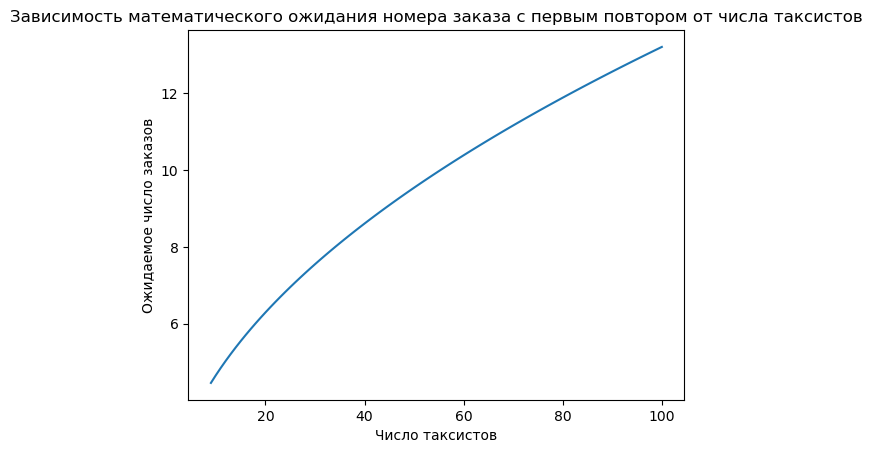

In [8]:
# Построим график зависимости математического ожидания номера заказа с первым повтором от количества таксистов
plt.plot(n_values, Es)

plt.xlabel('Число таксистов')
plt.ylabel('Ожидаемое число заказов')
plt.title('Зависимость математического ожидания номера заказа с первым повтором от числа таксистов');

__в)__

In [9]:
# Создадим функцию для подсчета вероятности
def P(n, k):
    return (np.math.factorial(n - 1) / np.math.factorial(n - (k - 1))) * ((k - 1) / n**(k - 1))


# Создадим функцию для поиска оценки метода максимального правдоподобия как максимум функции правдоподобия
def ML_estimation(L_values):
    return n_values[np.argmax(L_values)]


def E_option(n):
    """
    Можно считать мат. ожидание по этой функции, но это занимает слишком много времени. Поэтому ограничим значение оценки
    максимального правдоподобия 170, так как это примерно то число, при котором факториял пока еще не очень большой
    """
    E = 0
    for k in range(2, n + 2):
        P = 1
        for i in range(1, k - 1):
            P *= (1 - i / n)
        
        P *= (k - 1) / n
        E += k * P
            
    return E


# Создадим функцию для подсчета математического ожидания
def E(n):
    return np.sum([k * P(n, k) for k in range(2, n + 2)])


# Создадим функцию для поиска оценки метода моментов
def MM_estimation(n_values, k):
    deltas = [np.abs(E(n) - k) for n in n_values]
    return n_values[np.argmin(deltas)]

In [10]:
# Симмулируем заказ
def order(n, i):
    np.random.seed(i)
    # Присвоим каждому таксисту номер
    drivers = np.arange(1, n + 1)
    
    orders_story = set()
    curr_driver = np.random.choice(drivers)
    while curr_driver not in orders_story:
        orders_story.add(curr_driver)
        curr_driver = np.random.choice(drivers)

    return len(orders_story) + 1

In [11]:
n_obs = 100

# Получим номера повторных заказов для всех симмуляций
orders = [order(n_obs, i) for i in range(10**4)]

In [12]:
# Посмотрим на краевые значения
np.min(orders), np.max(orders)

(2, 42)

In [13]:
ML_estimations = []

# Пройдемся по каждой симмуляции отдельно
for k in orders:
    # В каждом конкретном случае количество таксистов не может быть меньше номера первого повторного заказа минус один
    n_values = range(k - 1, 901)
    
    # Найдем значения функции правдоподобия и ее максимум по n
    L_values = np.vectorize(P)(n_values, k)
    n_hat_ML = ML_estimation(L_values)
    ML_estimations.append(n_hat_ML)

In [14]:
# Оценим смещение
np.mean(ML_estimations) - 100

-3.9872000000000014

In [15]:
# Оценим дисперсию
np.var(ML_estimations, ddof=1)

8608.052241384139

In [16]:
# Оценим среднеквадратичную ошибку
ML_estimations = np.array(ML_estimations)

np.sum((ML_estimations - 100)**2 / len(ML_estimations))

8623.0892

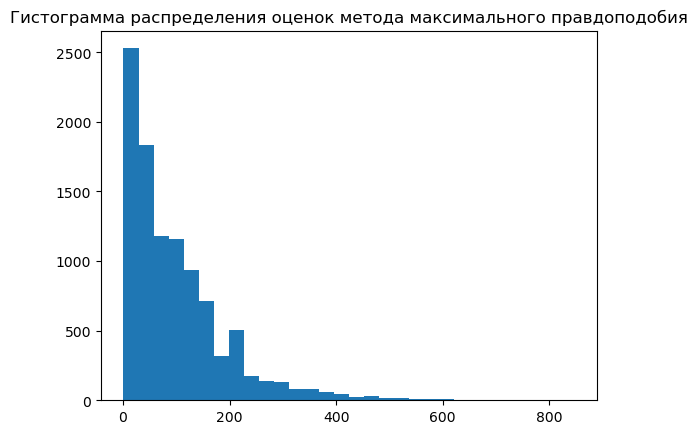

In [17]:
# Построим гистограмму для оценок метода максимального правдоподобия
plt.hist(ML_estimations, bins=30)

plt.title('Гистограмма распределения оценок метода максимального правдоподобия');

In [18]:
MM_estimations = []

# Пройдемся по каждой симмуляции отдельно
for k in orders:
    # В каждом конкретном случае количество таксистов не может быть меньше номера первого повторного заказа минус один
    n_values = range(k - 1, 171)

    
    # Найдем оценку метода моментов, важно заметить, что оценки ограничены 170
    n_hat_MM = MM_estimation(n_values, k)
    MM_estimations.append(n_hat_MM)

In [19]:
# Оценим смещение
np.mean(MM_estimations) - 100

-5.1861999999999995

In [20]:
# Оценим дисперсию
np.var(MM_estimations, ddof=1)

3621.4412736873683

In [21]:
# Оценим среднеквадратичную ошибку
MM_estimations = np.array(MM_estimations)

np.sum((MM_estimations - 100)**2 / len(MM_estimations))

3647.9758

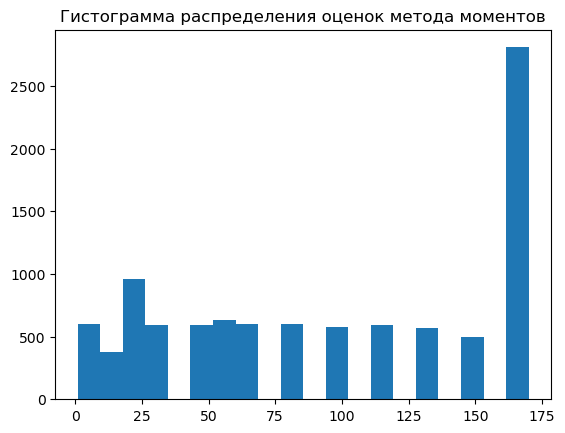

In [22]:
# Построим гистограмму для оценок метода моментов
plt.hist(MM_estimations, bins=20)
plt.title('Гистограмма распределения оценок метода моментов');